# Analysis: Variance in util loss

Date: 15.07.2020 Author: Stefan Heidekrüger

## TL:DR

When evaluating the ex-ante ('exa') and maximum ex-interim ('mexi') utility loss in the analytical bne, there is still some aleatoric uncertainty only coming from the different valuations.
For some of our settings, this variance is so high that EVEN THE ANALYTICAL BNE would not be deemed 'static' / 'converged' under our current stopping criterion with current parameters.

Below we consider the two settings of Uniform 10p Risk Averse and the overlapping uniform asymmetric case. In the former, calculating the exa-loss for the true bne yields a mean of 0.0001 with a std of 1.2e-5, which would still fulfill the stopping criterion.

However, in the latter, we get the following:
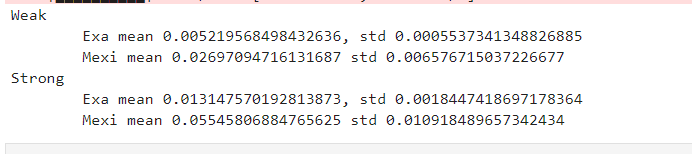

Thus, even the TRUE bne would not fulfill the stopping criterion (neither at 0.0001 nor 0.0005) in this setting.

In [41]:

import os
import sys
import numpy as np
from time import perf_counter as timer

root_path = os.path.join(os.path.expanduser('~'), 'bnelearn')
if root_path not in sys.path:
    sys.path.append(root_path)

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from cycler import cycler
colors = [(0/255.,191/255.,196/255.), (248/255.,118/255.,109/255.),
          (150/255.,120/255.,170/255.), (255/255.,215/255.,130/255.)] 
import torch
    
import bnelearn
from bnelearn.experiment.configuration_manager import ConfigurationManager
import bnelearn.util.metrics as metrics
import torch.nn as nn

In [28]:
specific_gpu = 2
torch.cuda.set_device(specific_gpu)

# Uniform Symmetric 10p Risk Averse

In [3]:
# payment_rule = 'first_price'
# risk = 0.5
# # n_players = [2, 3, 5, 10]
# n_players = 10

# util_loss_batch_size = 2 ** 12
# util_loss_grid_size = 2 ** 13
# experiment_type = 'single_item_uniform_symmetric'
# log_root_dir = os.path.join(os.path.expanduser('~'), 'bnelearn', 'experiments')

# experiment_config, experiment_class = \
#     ConfigurationManager(
#         experiment_type=experiment_type,
#         n_runs=1,
#         n_epochs=0,
#     ) \
#     .set_setting(
#         payment_rule=payment_rule,
#         risk=risk,
#         n_players=n_players,
#     ) \
#     .set_learning(
#         model_sharing=False,
#     ) \
#     .set_logging(
#         log_root_dir=log_root_dir,
#         util_loss_batch_size=util_loss_batch_size,
#         util_loss_grid_size=util_loss_grid_size,
#         enable_logging=False,
#         save_tb_events_to_csv_detailed=False,
#         save_tb_events_to_binary_detailed=False
#     ) \
#     .set_hardware(
#         specific_gpu=specific_gpu,
#     ) \
#     .get_config()

# experiment = experiment_class(experiment_config)

In [4]:
# exa_losses = []
# mexi_losses = []
# player_position = 0

# for i in range(20):
#     experiment.bne_env.prepare_iteration()
#     valuation = experiment.bne_env._observations[player_position, :util_loss_batch_size, ...]
#     ex_i_loss, _ = metrics.ex_interim_util_loss(
#         experiment.bne_env, player_position, valuation, util_loss_grid_size)
#     exa_losses.append(ex_i_loss.mean().item())
#     mexi_losses.append(ex_i_loss.max().item())

# uniform_sym_risk_10_exa = torch.tensor(exa_losses)
# uniform_sym_risk_10_mexi = torch.tensor(mexi_losses)

In [5]:
# uniform_sym_risk_10_exa.mean().item(), uniform_sym_risk_10_exa.std().item()

In [6]:
# uniform_sym_risk_10_mexi.mean().item(), uniform_sym_risk_10_mexi.std().item()

In [7]:
# uniform_sym_risk_10_exa

In [8]:
# [uniform_sym_risk_10_exa[i-3:i].max().item() - uniform_sym_risk_10_exa[i-3:i].min().item() for i in range(3,20)]    

# Asymmetric Overlapping

In [9]:
# experiment_type = 'single_item_asymmetric_uniform_overlapping'
# payment_rule = 'first_price'
# risk = 1.0
# n_players = 2

# util_loss_batch_size = 2**12
# util_loss_grid_size = 2**13
# log_root_dir = os.path.join(os.path.expanduser('~'), 'bnelearn', 'experiments')

# experiment_config, experiment_class = \
#     ConfigurationManager(
#         experiment_type=experiment_type,
#         n_runs=1,
#         n_epochs=0,
#     ) \
#     .set_setting(
#         payment_rule=payment_rule,
#         risk=risk,
#         n_players=n_players,
#     ) \
#     .set_learning(
#         model_sharing=False,
#     ) \
#     .set_logging(
#         log_root_dir=log_root_dir,
#         util_loss_batch_size=util_loss_batch_size,
#         util_loss_grid_size=util_loss_grid_size,
#         enable_logging=False,
#         save_tb_events_to_csv_detailed=False,
#         save_tb_events_to_binary_detailed=False
#     ) \
#     .set_hardware(
#         specific_gpu=specific_gpu,
#     ) \
#     .get_config()

# experiment = experiment_class(experiment_config)

In [10]:
# exa_losses_weak = []
# mexi_losses_weak = []
# exa_losses_strong = []
# mexi_losses_strong = []

# for i in range(20):
#     experiment.bne_env[0].prepare_iteration()

#     # weak bidder
#     valuation = experiment.bne_env[0]._observations[1, :util_loss_batch_size, ...]
#     ex_i_loss, _ = metrics.ex_interim_util_loss(
#         experiment.bne_env[0], 0, valuation, util_loss_grid_size)
#     exa_losses_weak.append(ex_i_loss.mean().item())
#     mexi_losses_weak.append(ex_i_loss.max().item())

#     # strong bidder
#     valuation = experiment.bne_env[0]._observations[1, :util_loss_batch_size, ...]
#     ex_i_loss, _ = metrics.ex_interim_util_loss(
#         experiment.bne_env[0], 1, valuation, util_loss_grid_size)
#     exa_losses_strong.append(ex_i_loss.mean().item())
#     mexi_losses_strong.append(ex_i_loss.max().item())

# uniform_asym_overlap_exa_weak = torch.tensor(exa_losses_weak)
# uniform_asym_overlap_mexi_weak = torch.tensor(mexi_losses_weak)
# uniform_asym_overlap_exa_strong = torch.tensor(exa_losses_strong)
# uniform_asym_overlap_mexi_strong = torch.tensor(mexi_losses_strong)

# print(f"Weak\n \tExa mean {uniform_asym_overlap_exa_weak.mean().item()}, std {uniform_asym_overlap_exa_weak.std().item()}\n \tMexi mean {uniform_asym_overlap_mexi_weak.mean().item()} std {uniform_asym_overlap_mexi_weak.std().item()}")
# print(f"Strong\n \tExa mean {uniform_asym_overlap_exa_strong.mean().item()}, std {uniform_asym_overlap_exa_strong.std().item()}\n \tMexi mean {uniform_asym_overlap_mexi_strong.mean().item()} std {uniform_asym_overlap_mexi_strong.std().item()}")

In [11]:
# [uniform_asym_overlap_exa_weak[i-3:i].max().item() - uniform_asym_overlap_exa_weak[i-3:i].min().item() for i in range(3, 20)]    

In [12]:
# [uniform_asym_overlap_exa_strong[i-3:i].max().item() - uniform_asym_overlap_exa_strong[i-3:i].min().item() for i in range(3, 20)]   

## Analysis of batch size and grid size

In [13]:
n_runs = 10
batch_sizes = np.array([2**i for i in reversed(range(2, 14))])
grid_sizes = np.array([2**i for i in reversed(range(4, 12, 2))])

In [14]:
experiment_type = 'single_item_asymmetric_uniform_overlapping'
log_root_dir = os.path.join(os.path.expanduser('~'), 'bnelearn', 'experiments')
sys.stdout = open(os.devnull, 'w')  # block all prints

estimated_relative_ex_ante_util_losses = np.zeros(
    (n_runs, batch_sizes.shape[0], grid_sizes.shape[0]), dtype=float)
estimated_relative_ex_ante_util_losses_time = np.zeros(
    (n_runs, batch_sizes.shape[0], grid_sizes.shape[0]), dtype=float)

epsilon_bounds = np.zeros(
    (n_runs, batch_sizes.shape[0], grid_sizes.shape[0]), dtype=float)
epsilon_bounds_time = np.zeros(
    (n_runs, batch_sizes.shape[0], grid_sizes.shape[0]), dtype=float)

for seed, run in enumerate(range(n_runs)):
    for i, batch_size in enumerate(batch_sizes):
        for j, grid_size in enumerate(grid_sizes):
            experiment_config, experiment_class = \
                ConfigurationManager(
                    experiment_type=experiment_type,
                    n_runs=1,
                    n_epochs=0,
                    seeds=[seed]
                ) \
                .set_learning(
                    pretrain_iters=0
                ) \
                .set_logging(
                    eval_batch_size=int(batch_size),
                    util_loss_batch_size=batch_size,
                    util_loss_grid_size=grid_size,
                    enable_logging=False,
                    save_tb_events_to_csv_detailed=False,
                    save_tb_events_to_binary_detailed=False
                ) \
                .set_hardware(
                    specific_gpu=specific_gpu,
                ) \
                .get_config()

            experiment = experiment_class(experiment_config)
            experiment._init_new_run()

            # BNE strategies
            for bidder, bne_bidder in zip(experiment.bidders, experiment.bne_env[0].agents):
                bidder.strategy = bne_bidder.strategy

            # util loss
            tic = timer()
            _, _, estimated_relative_ex_ante_util_loss = \
                experiment._calculate_metrics_util_loss(
                    False, batch_size=batch_size, opponent_batch_size=batch_size)
            utli_loss_elapsed = timer() - tic

            # bounds
            tic = timer()
            epsilon = metrics.verify_epsilon_bne(
                    exp=experiment, grid_size=grid_size,
                    opponent_batch_size=batch_size)
            epsilon_elapsed = timer() - tic

            # bidder 0 only
            estimated_relative_ex_ante_util_losses[run, i, j] = \
                estimated_relative_ex_ante_util_loss[1]
            estimated_relative_ex_ante_util_losses_time[run, i, j] = utli_loss_elapsed

            epsilon_bounds[run, i, j] = epsilon
            epsilon_bounds_time[run, i, j] = epsilon_elapsed

# Save
np.save('estimated_relative_ex_ante_util_losses.npy', estimated_relative_ex_ante_util_losses)
np.save('estimated_relative_ex_ante_util_losses_time.npy', estimated_relative_ex_ante_util_losses_time)

np.save('epsilon_bounds.npy', epsilon_bounds)
np.save('epsilon_bounds_time.npy', epsilon_bounds_time)

/home/kohring/bnelearn/bnelearn/experiment/configuration_manager.py:530: UserWarning: Using fixed valuations for evaluation. This may introduce bias!
  warnings.warn('Using fixed valuations for evaluation. This may introduce bias!')
/home/kohring/bnelearn/bnelearn/sampler/samplers_ipv.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  lower_bound = torch.tensor(support.lower_bound).relu()
/home/kohring/bnelearn/bnelearn/sampler/samplers_ipv.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  upper_bound = torch.tensor(support.upper_bound)
/opt/anaconda/anaconda3/envs/bnelearn/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it w

In [42]:
markers = ['o', '^', 's', 'p', '.', '+'] * 3
def plot(metric, time):
    _, axs = plt.subplots(1, 2, figsize=(10, 5))
    for ax, y in zip(axs, [metric, time]):
        for j, grid_size in enumerate(grid_sizes):
            mean, std = y[:, :, j].mean(axis=0), y[:, :, j].std(axis=0)
            ax.plot(batch_sizes, mean,
                    label='$n_{grid}=$' + f'{grid_size}',
                    ms=7, color=colors[j], marker=markers[j])
            ax.fill_between(batch_sizes, mean-std, mean+std, alpha=.3,
                            color=colors[j])
        ax.set_xlabel('batch size $n_{batch}$')
        ax.grid(linestyle='--'); ax.set_xscale('log'); ax.set_yscale('log')
    axs[0].legend(loc='lower left')
    return axs

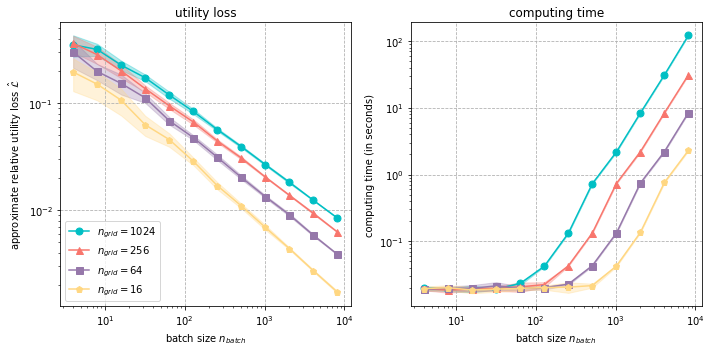

In [43]:
# Load
estimated_relative_ex_ante_util_losses = np.load('estimated_relative_ex_ante_util_losses.npy')
estimated_relative_ex_ante_util_losses_time = np.load('estimated_relative_ex_ante_util_losses_time.npy')

axs = plot(estimated_relative_ex_ante_util_losses, estimated_relative_ex_ante_util_losses_time)
axs[0].set_title('utility loss'); axs[1].set_title('computing time')
axs[0].set_ylabel('approximate relative utility loss $\\hat{\mathcal{L}}$')
axs[1].set_ylabel('computing time (in seconds)')
plt.tight_layout(); plt.savefig('utility-loss_quality.pdf')
plt.show()

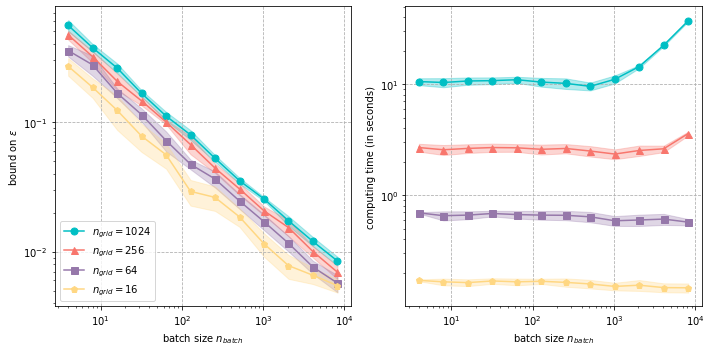

In [44]:
# Load
epsilon_bounds = np.load('epsilon_bounds.npy')
epsilon_bounds_time = np.load('epsilon_bounds_time.npy')

axs = plot(epsilon_bounds, epsilon_bounds_time)
axs[0].set_ylabel('bound on $\epsilon$'); axs[1].set_ylabel('computing time (in seconds)')
plt.tight_layout(); plt.savefig('epsilon-bound_quality.pdf')
plt.show()